In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [111]:
metadata_path="/panfs/panfs1.ucsd.edu/panscratch/jhc103/microbiome-analysis/metadata/vert_metadata_new_sublime.txt"
output_fig_dir="/panfs/panfs1.ucsd.edu/panscratch/jhc103/VertMetaphlan-frmerged/figures/"


In [28]:
df_md = pd.read_csv(metadata_path, sep="\t")

In [43]:
df_md.head()

,SampleID,sample_name,studyID,file_filtered_r1r2_combined,reads_per_unfiltered_file,reads_per_file,species_id,host_phylum,host_class,host_family,...,host_modality,host_diet,country,habitat,sample_type,diet_category_12,diet_category_3,captive_wild,host_reads,host_reads (%)
0,Artibeus-intermedius_S_S_Temp_D709-AK1780_filt...,2338.0623.7.I,2338,Artibeus-intermedius_S_S_Temp_D709-AK1780_filt...,10812150,10809968,great_fruit-eating_bat.1,Chordata,Mammalia,Phyllostomidae,...,NaN,NaN,CostaRica,NaN,NaN,frugivore,herbivore,wild,2182,0.000202
1,Carollia-perspicillata_S_S_Temp_D709-AK1682_fi...,2338.0620.8.I,2338,Carollia-perspicillata_S_S_Temp_D709-AK1682_fi...,28375062,28354050,sebas_short-tailed_bat.1,Chordata,Mammalia,Phyllostomidae,...,NaN,NaN,CostaRica,NaN,NaN,frugivore,herbivore,wild,21012,0.000741
2,Carollia-perspicillata_S_S_Temp_D712-AK1544_fi...,2338.0623.9.I,2338,Carollia-perspicillata_S_S_Temp_D712-AK1544_fi...,122751186,122713288,sebas_short-tailed_bat.2,Chordata,Mammalia,Phyllostomidae,...,NaN,NaN,CostaRica,NaN,NaN,frugivore,herbivore,wild,37898,0.000309
3,Carollia-perspicillata_S_S_Temp_D712-AK1546_fi...,2338.0627.22.I2,2338,Carollia-perspicillata_S_S_Temp_D712-AK1546_fi...,8559788,8556874,sebas_short-tailed_bat.3,Chordata,Mammalia,Phyllostomidae,...,NaN,NaN,CostaRica,NaN,NaN,frugivore,herbivore,wild,2914,0.000340
4,Carollia-perspicillata_S_S_Temp_D709-AK1681_fi...,2338.0701.17.I,2338,Carollia-perspicillata_S_S_Temp_D709-AK1681_fi...,488426,487862,sebas_short-tailed_bat.4,Chordata,Mammalia,Phyllostomidae,...,NaN,NaN,CostaRica,NaN,NaN,frugivore,herbivore,wild,564,0.001155


In [50]:
df_md.set_index('species_id', inplace=True)

In [51]:
## Create host_read column
df_md["host_reads"] = df_md["reads_per_unfiltered_file"]-df_md["reads_per_file"]

In [52]:
## Create host_read column by percentage 
df_md["host_reads (%)"] = (df_md["reads_per_unfiltered_file"]-df_md["reads_per_file"])/df_md["reads_per_unfiltered_file"]

In [53]:
## Visualize top 20 highest host reads 
host_read_series_top20=(df_md.sort_values('host_reads (%)', ascending=False))["host_reads (%)"].iloc[0:20]

In [54]:
host_read_nominal_series_top20=(df_md.sort_values('host_reads', ascending=False))["host_reads"].iloc[0:20]

In [62]:
print(host_read_series_top20)
print("--------------------")
print(host_read_nominal_series_top20)

species_id
common_vampire_bat.4       0.984616
european_polecat.1         0.980151
common_teal.1              0.978179
common_vampire_bat.3       0.976592
common_vampire_bat.1       0.976375
common_vampire_bat.2       0.974114
common_rudd.2              0.971690
common_toad.2              0.971646
steppe_polecat.2           0.966259
harbor_porpoise.1          0.963699
common_toad.1              0.954300
eurasian_red_squirrel.1    0.950956
sea_lamprey.2              0.945993
sea_lamprey.3              0.942807
sea_lamprey.8              0.941376
ring-necked_pheasant.1     0.938349
house_mouse.3              0.936286
sea_lamprey.9              0.935459
ring-necked_pheasant.2     0.934339
sea_lamprey.5              0.933907
Name: host_reads (%), dtype: float64
--------------------
species_id
sea_lamprey.3               99746602
sea_lamprey.5               75939462
northern_brook_lamprey.2    75330292
sea_lamprey.1               68284106
sea_lamprey.8               64082700
sea_lamprey.9  

In [71]:
## sort metadata based on reads_per_unfiltered_file
df_md.sort_values('reads_per_unfiltered_file', ascending=False, inplace=True)

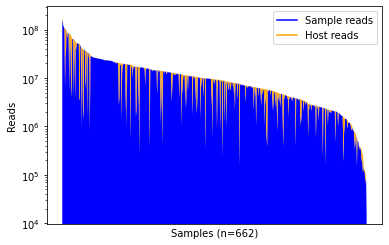

In [124]:
fig, ax = plt.subplots()

plt.plot([],[],color='blue',label='Sample reads')
plt.plot([],[],color='orange', label='Host reads')
plt.stackplot(df_md.index,df_md['reads_per_file'],df_md['host_reads'],
               colors =['blue', 'orange'])
plt.legend()

plt.xlabel("Samples (n=662)")
plt.ylabel("Reads")
plt.yscale('log')
# p0=sns.barplot(x=df_md["sample_name"], y=df_md['reads_per_file'], data=df_md)
# p1=sns.barplot(x=df_md["sample_name"], y=df_md['host_reads'], data=df_md)

# plt.savefig(`output_fig_dir+"alpha_diversity_diet_category_3_group.png",dpi=900, bbox_inches="tight")
# p0.tick_params(bottom = False)
ax = plt.gca()
ax.axes.xaxis.set_ticks([])
ax.axes.xaxis.set_ticklabels([])
plt.savefig(output_fig_dir+"host_filter_result.png",dpi=900)
plt.show()


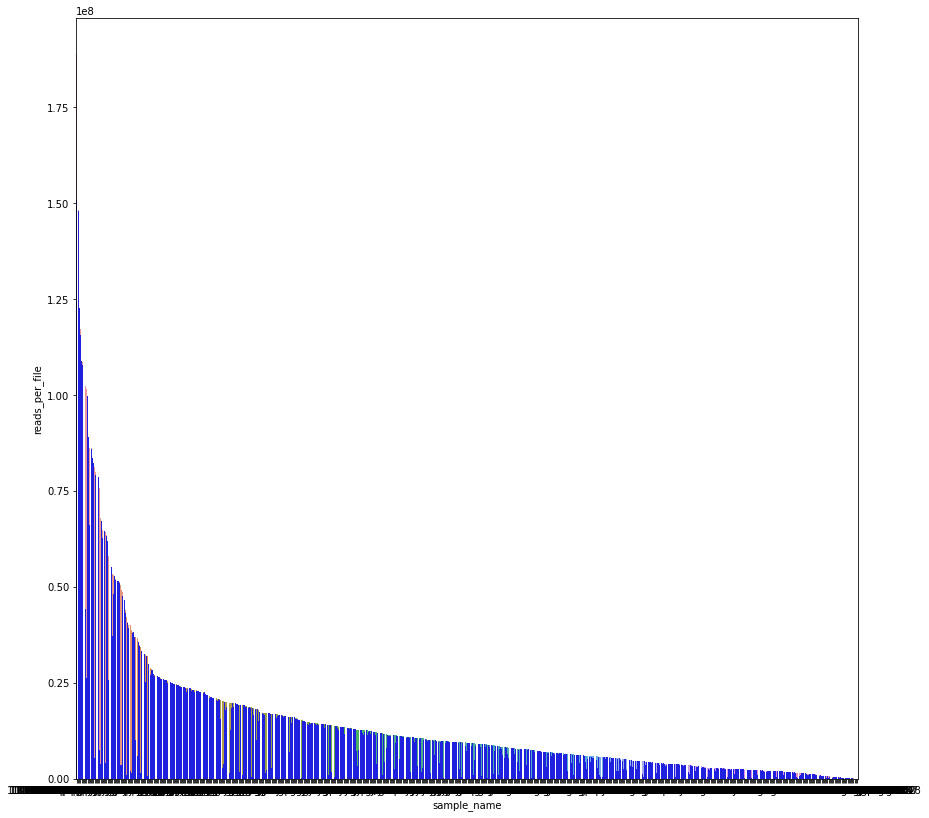

In [103]:
plt.figure(figsize=(14,14))
s1 = sns.barplot(x="sample_name", y='reads_per_unfiltered_file', data=df_md)

s1= sns.barplot(x="sample_name", y="reads_per_file",data=df_md, color="blue")  

In [34]:
df_md["species_id"].iloc[0:20]

0       great_fruit-eating_bat.1
1       sebas_short-tailed_bat.1
2       sebas_short-tailed_bat.2
3       sebas_short-tailed_bat.3
4       sebas_short-tailed_bat.4
5     sowells_short-tailed_bat.1
6       american_brook_lamprey.1
7       american_brook_lamprey.2
8       american_brook_lamprey.3
9                   bald_eagle.1
10             banded_mongoose.2
11           bronzewinged_duck.1
12                 brown_hyena.1
13                  brown_kiwi.2
14                  brown_kiwi.3
15                   cassowary.3
16                   cassowary.4
17                 common_rudd.2
18                 common_teal.1
19                 common_toad.1
Name: species_id, dtype: object

In [67]:
print("The total % of host reads from dataset is: ")
unfiltered_sample=df_md['reads_per_unfiltered_file'].sum()
host_reads=df_md['host_reads'].sum()
print(str(100*host_reads/unfiltered_sample)+"%")

The total % of host reads from dataset is: 
17.80088127288445%


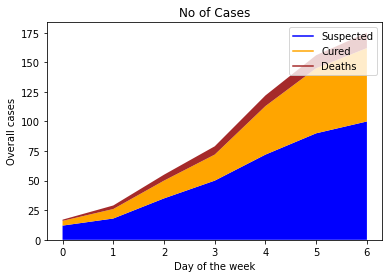

In [121]:
days = [x for x in range(0, 7)]
  
# List of Suspected cases
Suspected = [12, 18, 35, 50, 72, 90, 100]
  
# List of Cured Cases
Cured = [4, 8, 15, 22, 41, 55, 62]
  
# List of Number of deaths
Deaths = [1, 3, 5, 7, 9, 11, 13]
  
# Plot x-labels, y-label and data
plt.plot([], [], color ='blue', 
         label ='Suspected')
plt.plot([], [], color ='orange',
         label ='Cured')
plt.plot([], [], color ='brown',
         label ='Deaths')
  
# Implementing stackplot on data
plt.stackplot(days, Suspected, Cured, 
              Deaths, baseline ='zero', 
              colors =['blue', 'orange', 
                       'brown'])
  
plt.legend()
  
plt.title('No of Cases')
plt.xlabel('Day of the week')
plt.ylabel('Overall cases')
  
plt.show()